### Downloading Images from google

In [0]:
!pip install google_images_download

In [1]:
from google.colab import drive
drive.mount('./gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./gdrive


In [2]:
cd ./gdrive/My Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [0]:
##  !googleimagesdownload --keywords "sushi, ramen"

In [0]:
cd ..

/content/gdrive/My Drive/Colab Notebooks


### Preprocessing image data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_path = "./downloads/"

In [4]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [5]:
train_batches = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator=train_batches.flow_from_directory(train_path, 
                                                         target_size=(224,224,),
                                                         classes=['sushi','ramen'],
                                                         batch_size=10,
                                                  subset='training')

valid_generator=train_batches.flow_from_directory(train_path, 
                                                         target_size=(224,224,),
                                                         classes=['sushi','ramen'],
                                                         batch_size=10,
                                                  subset='validation')                                   

Found 159 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
imgs, labels = next(train_generator)

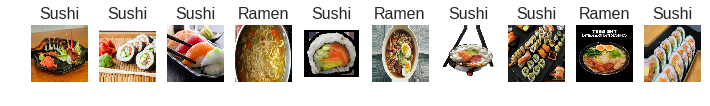

In [12]:
#test_imgs, test_labels = next(valid_generator)
plots(imgs*255, titles=["Ramen" if l[0]==0. else "Sushi" for l in labels  ])

### Building and training simple CNN

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
input_shape=(224,224,3)
num_classes=2

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.fit_generator(train_generator,
                   steps_per_epoch=20,
                    epochs=10,
                    validation_steps=1,
                   verbose=2,
                    validation_data=valid_generator)

Epoch 1/10
 - 16s - loss: 8.2478 - acc: 0.4883 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 2/10
 - 11s - loss: 7.9168 - acc: 0.5088 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 3/10
 - 13s - loss: 8.3625 - acc: 0.4812 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
 - 12s - loss: 7.8807 - acc: 0.5111 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
 - 11s - loss: 8.0060 - acc: 0.5033 - val_loss: 6.4472 - val_acc: 0.6000
Epoch 6/10
 - 13s - loss: 8.1842 - acc: 0.4922 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 7/10
 - 12s - loss: 7.8618 - acc: 0.5122 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
 - 12s - loss: 8.3816 - acc: 0.4800 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 9/10
 - 12s - loss: 8.1842 - acc: 0.4922 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 10/10
 - 13s - loss: 7.9974 - acc: 0.5038 - val_loss: 4.8354 - val_acc: 0.7000


In [0]:
##model.save('./models/sushi.h5')  size is 1GB

## Using Pretrained VGG16 Model

### Fine tuning VGG16 model

In [16]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 43s 0us/step


In [17]:
type(vgg16_model) ## its Model we need Sequential model

keras.engine.training.Model

In [0]:
from keras.layers import InputLayer

In [0]:
model = Sequential()
model.add(InputLayer(input_shape=input_shape))
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [0]:
model.summary()

In [0]:
for layer in model.layers:
  layer.trainable = False

In [0]:
model.add(Dense(2, activation='softmax'))

In [0]:
model.summary()

### Train the vgg16

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [52]:
model.fit_generator(train_generator,
                   steps_per_epoch=20,
                    epochs=10,
                    validation_steps=3,
                   verbose=2,
                    validation_data=valid_generator)

Epoch 1/10
 - 15s - loss: 0.1943 - acc: 0.9189 - val_loss: 0.5300 - val_acc: 0.7857
Epoch 2/10
 - 11s - loss: 0.2431 - acc: 0.8894 - val_loss: 0.2132 - val_acc: 0.9643
Epoch 3/10
 - 12s - loss: 0.3151 - acc: 0.8600 - val_loss: 0.3338 - val_acc: 0.8214
Epoch 4/10
 - 12s - loss: 0.3259 - acc: 0.8694 - val_loss: 0.3307 - val_acc: 0.7333
Epoch 5/10
 - 12s - loss: 0.2576 - acc: 0.8749 - val_loss: 0.3363 - val_acc: 0.8929
Epoch 6/10
 - 10s - loss: 0.1835 - acc: 0.9100 - val_loss: 0.1699 - val_acc: 0.8929
Epoch 7/10
 - 12s - loss: 0.3065 - acc: 0.8844 - val_loss: 0.4394 - val_acc: 0.8214
Epoch 8/10
 - 13s - loss: 0.2772 - acc: 0.8944 - val_loss: 0.0924 - val_acc: 0.9667
Epoch 9/10
 - 12s - loss: 0.1827 - acc: 0.9284 - val_loss: 0.2323 - val_acc: 0.8571
Epoch 10/10
 - 10s - loss: 0.2126 - acc: 0.9050 - val_loss: 0.6586 - val_acc: 0.7857


In [0]:
#model.save('./models/sushi.h5')

In [0]:
#del model

### Predicting

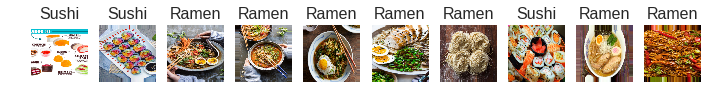

In [55]:
test_imgs, test_labels = next(valid_generator)
plots(test_imgs*255, titles=["Ramen" if l[0]==0. else "Sushi" for l in test_labels  ])

In [82]:
train_generator.class_indices ###i.e. index 0 corresponds to sushi and ..

{'ramen': 1, 'sushi': 0}

In [81]:
new_model.predict_generator(valid_generator, steps=2,verbose=0) ##steps is no. of batches

array([[3.2455724e-01, 6.7544270e-01],
       [7.3899567e-01, 2.6100433e-01],
       [7.8030074e-01, 2.1969929e-01],
       [5.5359578e-06, 9.9999452e-01],
       [3.3830790e-04, 9.9966168e-01],
       [4.9932979e-02, 9.5006698e-01],
       [1.2106984e-01, 8.7893015e-01],
       [2.7454039e-01, 7.2545958e-01],
       [3.1684470e-01, 6.8315536e-01],
       [6.5857279e-01, 3.4142715e-01],
       [3.8885498e-01, 6.1114502e-01],
       [8.3315065e-03, 9.9166846e-01],
       [9.8712498e-01, 1.2874978e-02],
       [9.2156440e-02, 9.0784359e-01],
       [7.1629006e-03, 9.9283713e-01],
       [5.8167105e-05, 9.9994183e-01],
       [9.8709967e-03, 9.9012905e-01],
       [1.2813914e-02, 9.8718613e-01]], dtype=float32)

In [0]:
test_labels ## [0,1] is for ramen  

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

### Testing on new single image

In [0]:
from keras.models import load_model

In [0]:
new_model = load_model('./models/sushi.h5')

In [0]:
new_model.summary()

In [0]:
from keras.preprocessing.image import img_to_array
from PIL import Image

In [0]:
def preprocess_image(image, target_size):
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = image.resize(target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    return image

In [0]:
img = Image.open('./downloads/ramen/11. healthy-spicy-sriracha-shrimp-ramen-noodle-soup-bowls-recipe-7075.jpg')


In [0]:
processed_image = preprocess_image(img, target_size=(224, 224))
prediction = new_model.predict(processed_image).tolist()

In [67]:
prediction

[[0.08467880636453629, 0.9153212308883667]]

In [69]:
valid_generator.class_indices ###i.e. index 0 corresponds to sushi and ..

{'ramen': 1, 'sushi': 0}

sushi: 0.08467880636453629  ramen : 0.9153212308883667


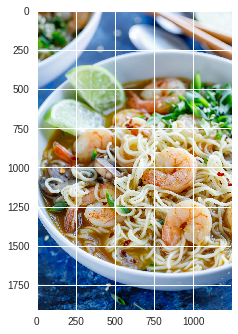

In [77]:
plt.imshow(img)
print('sushi:',prediction[0][0],' ramen :',prediction[0][1])